# Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)

$$\hat y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdot \cdot \cdot + \theta_nx_n$$

* $\hat y$ is the predicted value

* $n$ is the number of features

* $x_i$ is the $i^{th}$ feature value

* $\theta_j$ is the $j^{th}$ model parameter

This can be written much more concisely using a vectorized form

$$\hat y = h_\theta(x) = \theta \cdot x$$

* $\theta$ is the model’s parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

* $x$ is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1

* $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which is of course equal to $\theta_0x_0 + \theta_1x_1 + \cdot \cdot \cdot + \theta_nx_n$

* $h_0$ is the hypothesis function, using the model parameters $\theta$

We first need a measure of how well (or poorly) the model fits the training data. In Chapter 2 we saw that the most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the RMSE

In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root)

The MSE of a Linear Regression hypothesis $h_0$ on a training set X is calculated using MSE cost function for a Linear Regression model

$$ MSE(X,h_\theta) = {1\over{m}} \sum_{i =1 }^m(\theta{^T}x^{(i)} - y^{(i)})^2  $$

## The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution —in other words, a mathematical equation that gives the result directly. This is called the Normal Equation

$$ \hat\theta = (X^T X)^{-1} X^T y $$

* $\hat \theta$ is the value of $\theta$ that minimizes the cost function

* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

Let’s generate some linear-looking data to test this equation

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

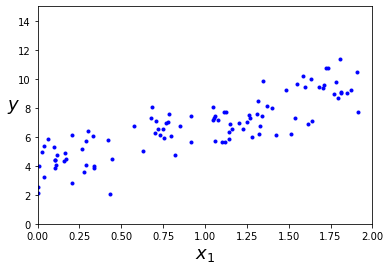

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now let’s compute $\hat \theta$ using the Normal Equation. We will use the function from inv() NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication 

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $y = 4 + 3x_1$ + Gaussian noise. Let’s see what the equation found

In [ ]:
theta_best

array([[3.95301192],
       [2.89095379]])

We would have hoped for $θ_0 = 4$ and $θ_1 = 3$ instead of $θ_0 = 4.215$ and $θ_1 = 2.770$. Close enough, but the noise made it impossible to recover the exact parameters of the original function

Now you can make predictions using $\hat \theta$

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.95301192],
       [9.7349195 ]])

Let’s plot this model’s predictions

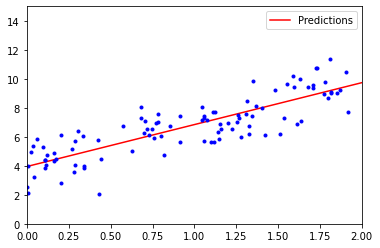

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend(['Predictions'])
plt.show()

Performing linear regression using Scikit-Learn is quite simple

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.95301192]), array([[2.89095379]]))

In [ ]:
lin_reg.predict(X_new)

array([[3.95301192],
       [9.7349195 ]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.95301192],
       [2.89095379]])

This function computes $\hat \theta = X^+ y$, 
where $X^+$ is the pseudoinverse of $X$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.95301192],
       [2.89095379]])

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U \Sigma V^T$ (see numpy.linalg.svd())

The pseudoinverse is computed as $X^+ = V\Sigma U^T$. To compute the matrix $\Sigma^+$, the algorithm takes $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix.

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $X^T X$ is not invertible (i.e., singular), such as if $m < n$ or if some features are redundant, but the pseudoinverse is always defined



# Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function

it measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gra dient is zero, you have reached a minimum

<p align='center'>
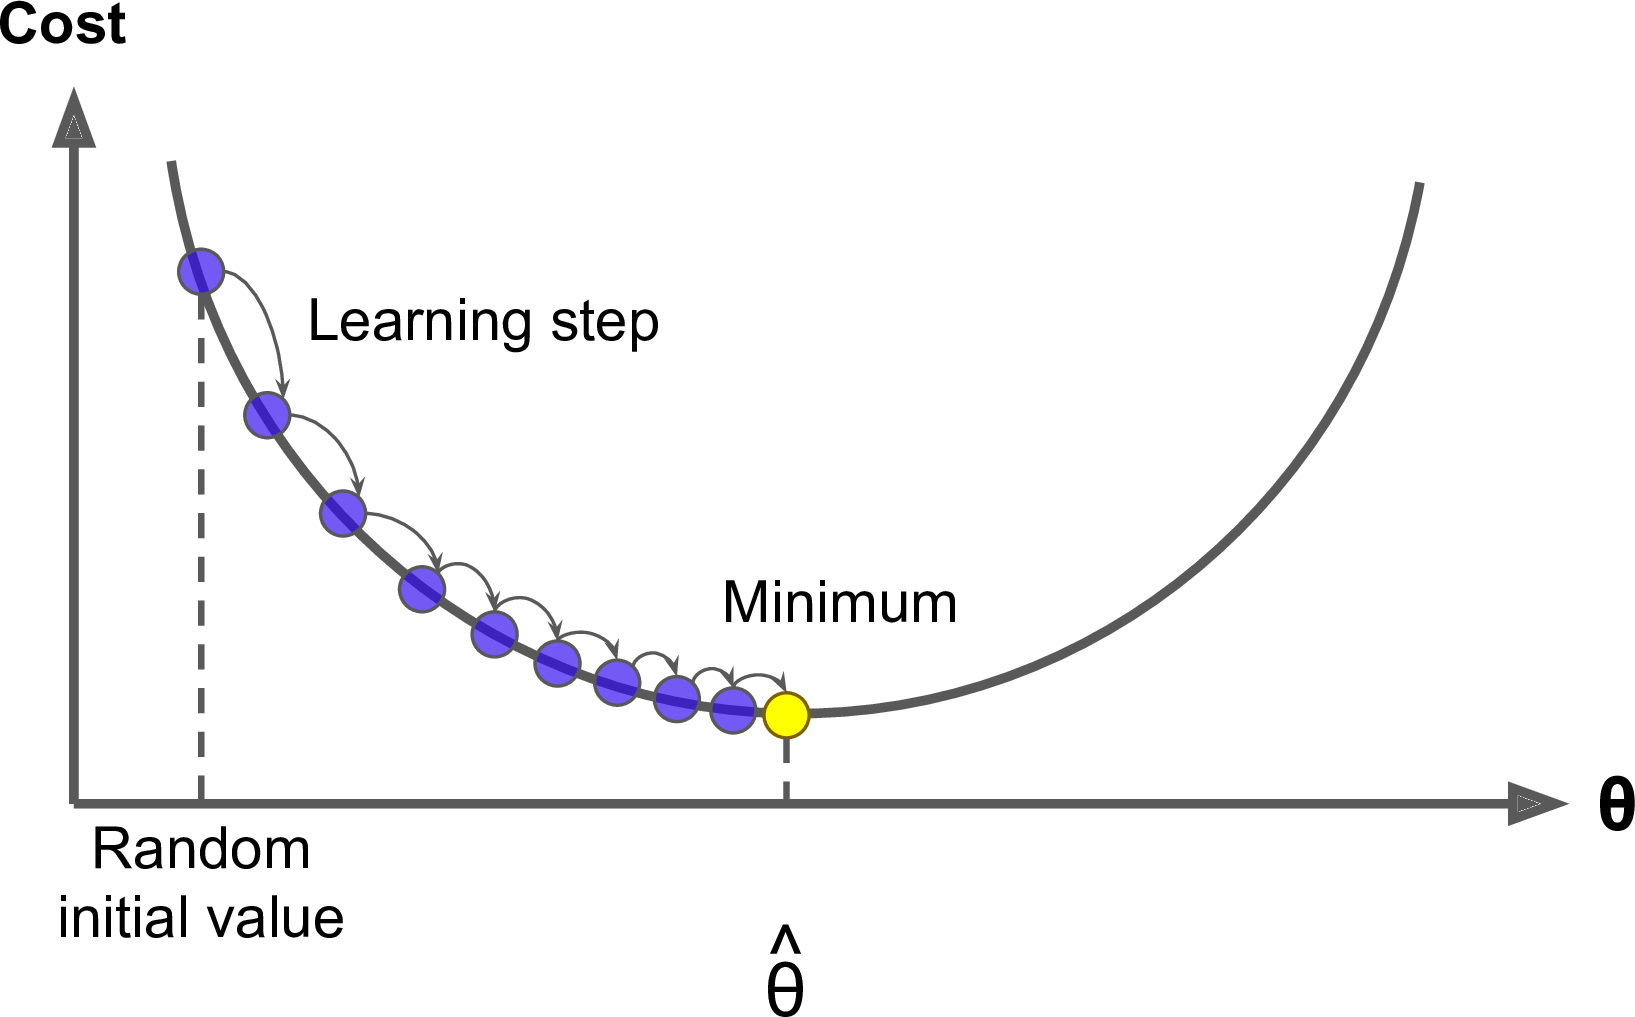

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

<p align='center'>
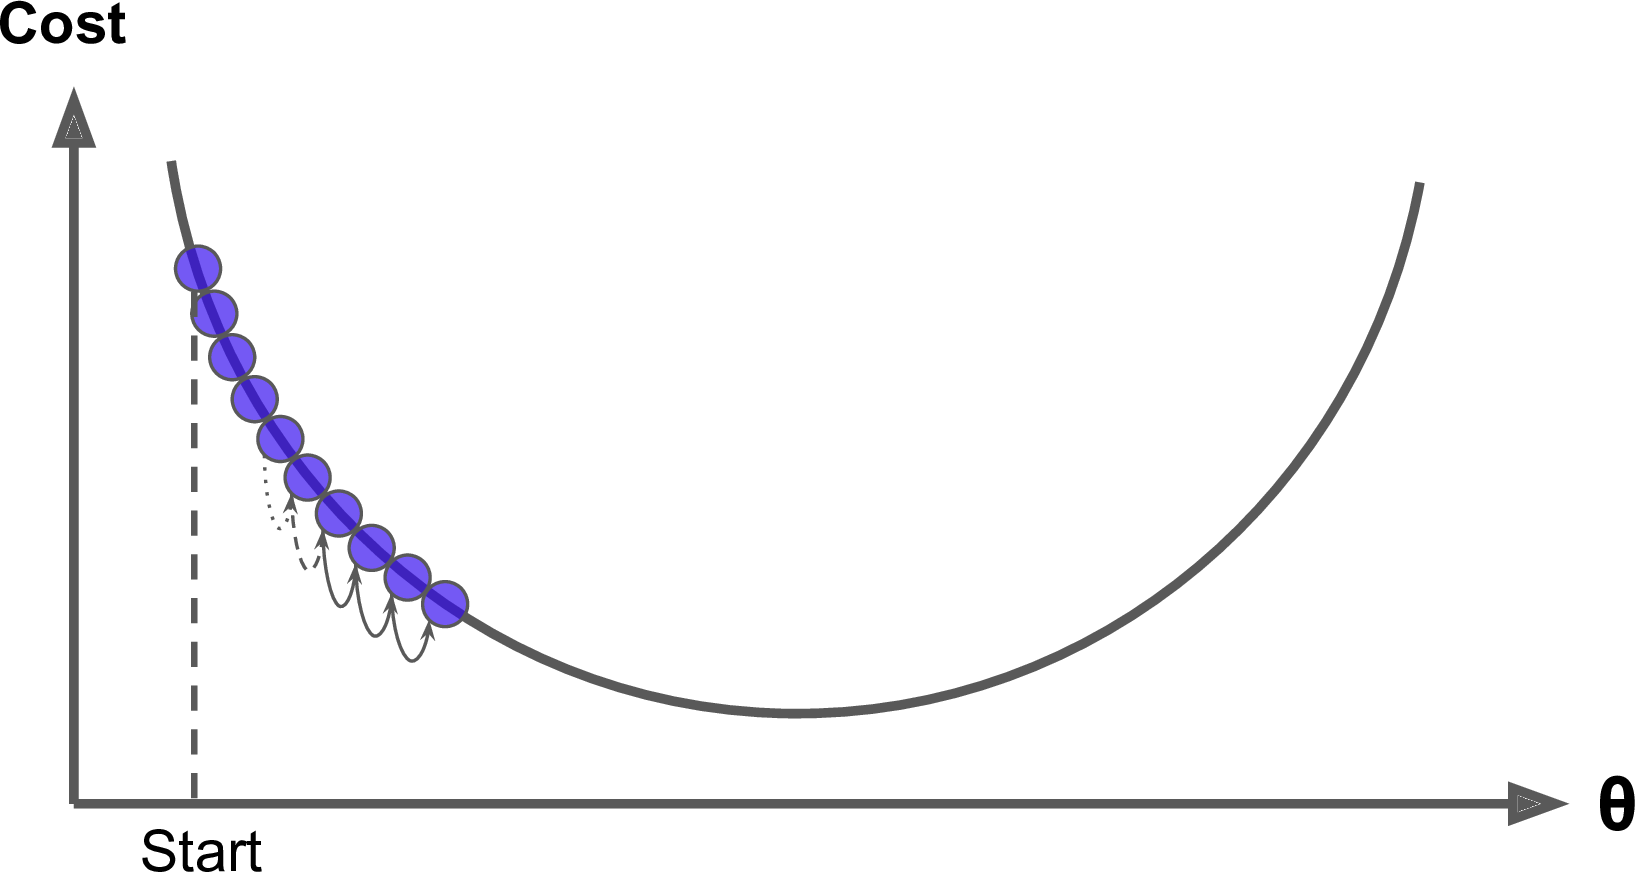
</p>